<a href="https://colab.research.google.com/github/DoubleCyclone/Credit-Card-Fraud-Detection/blob/main/notebooks/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Credit Card Fraud was and is an ongoing issue since they have been a thing. As the businesses grow and technology advances, ways to commit fraud also evolve. For this reason, it is of utmost importance that individuals and businesses adopt the most up-to-date and successful fraud prevention/detection mechanisms. This might mostly fall under Cyber Security but as a Machine Learning (self proclaimed) student, I will be working with the dataset from https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data in order to discuss how to make data and/or classification models better so that the model is the best it can be at detecting real credit card fraud and avoids flagging genuine transactions as potentially fraud.

I will start by mounting my Google Drive to which I uploaded the dataset.

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.preprocessing as skp
import sklearn.model_selection as skm

In [106]:
# Mount the Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1 - Data Understanding
It can be said that learning about the data is paramount when it comes to training models so I will load the dataset and then immediately start visualising.

In [107]:
# Load the dataset
X = pd.read_csv('/content/drive/MyDrive/Colab_Materials/Credit_Card_Fraud_Detection/creditcard.csv')

# Print shape
print(f"Shape of the full Dataset : {X.shape}")

# display first few rows
X.head()

Shape of the full Dataset : (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


A dataset with 284807 records and 31 features. I want to learn a lot more about this data so let's start with that.

In [108]:
# Print Unique Data Types
print(f"Feature types : {set(X.dtypes.tolist())}")
print(f"Features with missing data : {[col for col in X if X[col].isna().any()]}")

Feature types : {dtype('float64'), dtype('int64')}
Features with missing data : []


That is interesting. This Dataset includes only numerical features and there are no columns with missing data so I don't need to manage these myself. (I could just simulate it myself but I think we have more important matters at hand right now). For the record, a Class of 1 means the transaction is fraudulent and 0 means that the transaction is genuine.

In [109]:
# Set this to show all columns
pd.set_option('display.max_columns', None)

# Display information about all columns of the data
X.describe(include="all")


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Most of the features look close in range to each other which is great but I will have to normalize **Time** and **Amount** later on so that they don't affect the model more than the other features which are overall a lot smaller in magnitude. For now, let's take the label (**Class**) out of our dataset so that I don't train the model with it.

In [110]:
# Drop the label from the dataset and assign it to a label list
X_train = X.drop('Class', axis=1).copy()

# Create a label dataframe
y = pd.DataFrame(X['Class'].copy())

# Display first few rows
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


Now that the labels and the features are separated, let's start visualizing and collecting more information about the data. Starting with the labels as it is just one column and can only take 2 values.

Fraudulent Transaction Count = 492
Genuine Transaction Count = 284315



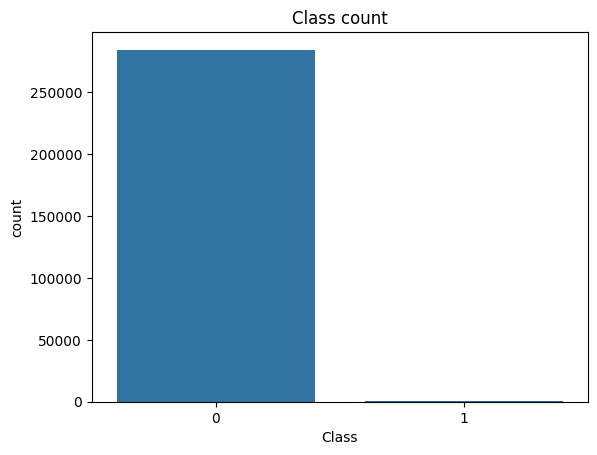

In [111]:
# Display the count plot for the label
_ = sns.countplot(y, x="Class").set(title="Class count")

# Print the counts
print(f"Fraudulent Transaction Count = {(y['Class'] == 1).sum()}")
print(f"Genuine Transaction Count = {(y['Class'] == 0).sum()}\n")

Wow, the class imbalance here is a big problem. Overwhelmingly large portion of our labels are 0 (Genuine transactions). Fraudulent transactions' count being this low is usually a good thing but to train a Classification Model as well as possible, I need a more balanced dataset. For now, let's visualise the features' distributions as well.

In [126]:
def hist_plot_all_features(df : pd.DataFrame):
  # Create a composite plot for all the features
  fig, axs = plt.subplots(int(np.ceil(len(df.columns) / 6)), 6, figsize=(24, np.ceil(len(df.columns) * 4 / 6)))

  # Flatten multi-dimensional into one-dimensional to easily iterate through
  axs = axs.flatten()

  # Iterate through the columns and plot their histograms
  for i, col in enumerate(df.columns) :
    sns.histplot(data=df, x=col, ax=axs[i], bins=30, kde=True)

  # Fix the overlap
  fig.tight_layout()

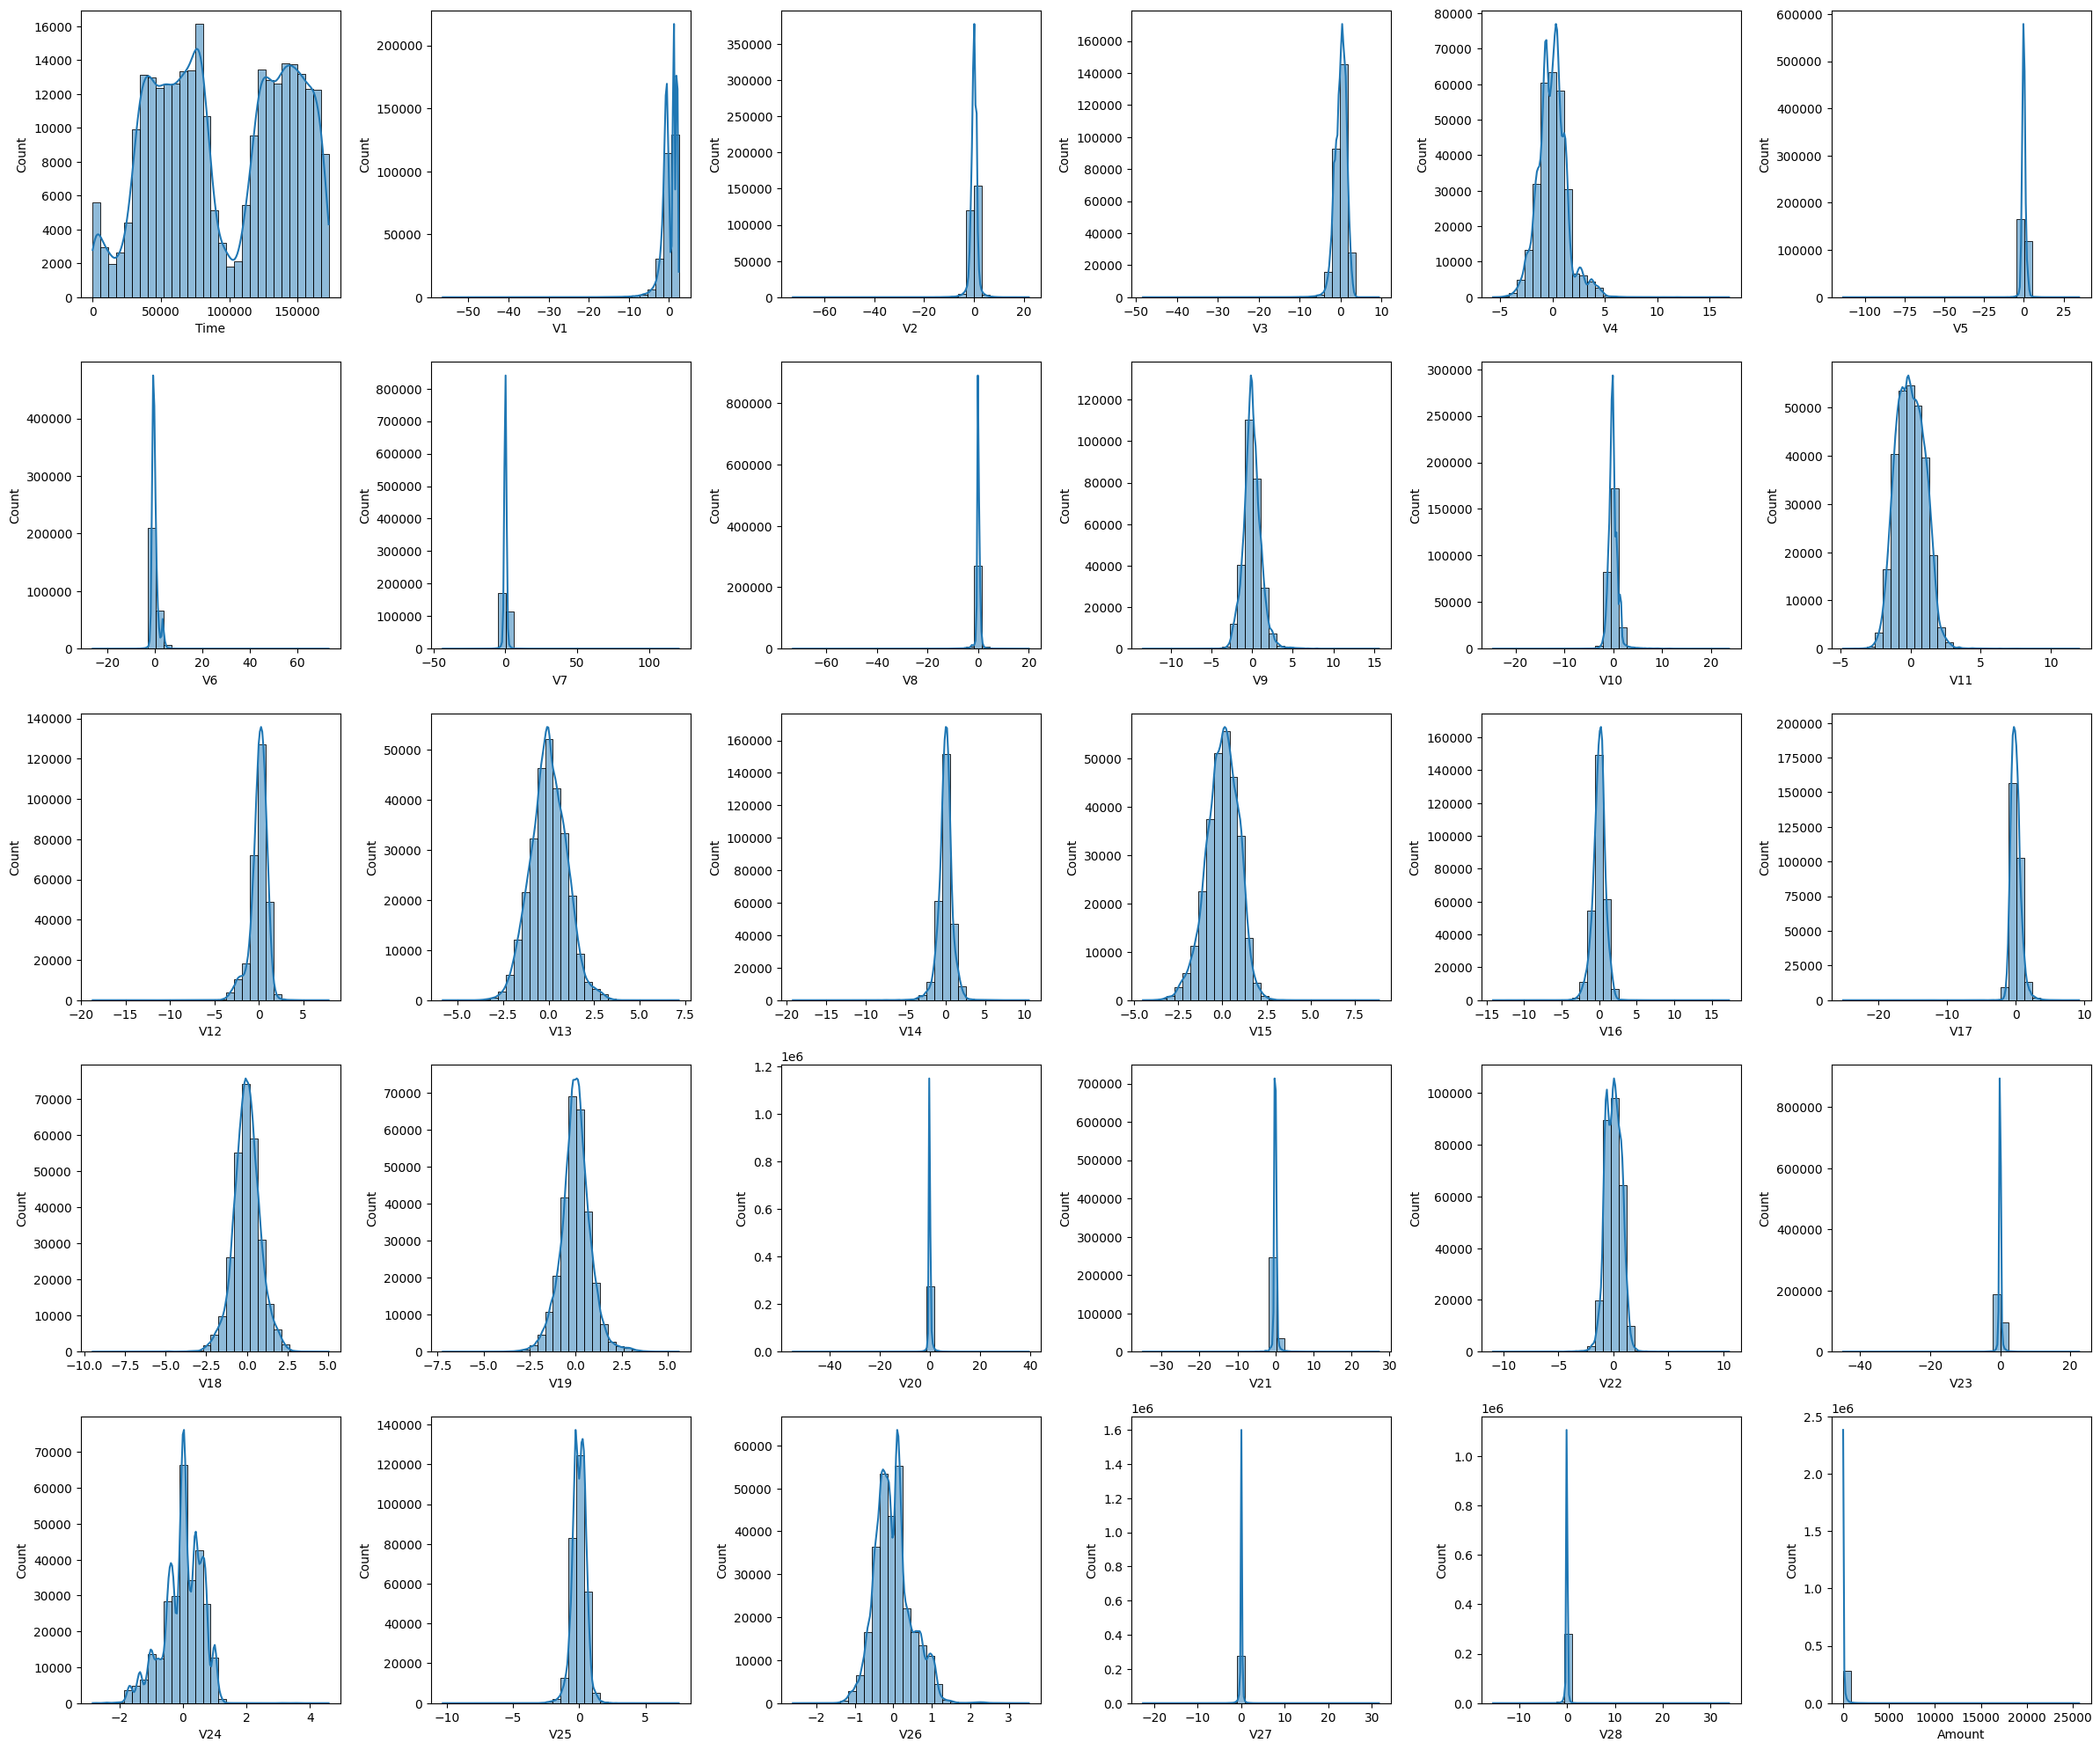

In [127]:
hist_plot_all_features(X_train)

Most of our features's plots look like a normal distribution which is also useful. Maybe they have been normalized before the upload. Though I will still have to normalize at least a few of them as well to be consistent.

# 2 - Preprocessing
Now it is time to get the data to be the most useful it can be. There are a few things I can do so let's start by normalizing the data to ensure no feature overwhelms the others' contributions. Looking at our distributions, I can see that the **Amount** feature is heavily skewed so I think it is the best to run **Power Transformer**. Specifically **Yeo-Johnson** because even though amount feature can never be a negative number, there are a few zeros here and there so the **Box-Cox** method would not work. For the **Time** feature, I will run **StandardScaler** (Z-Score Normalization) as it is not really skewed and resembles a normal distribution even if a little. I am planning on leaving the rest be because they already look normalized.

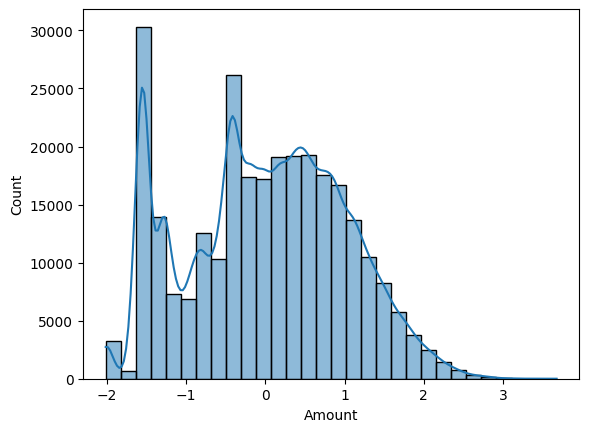

In [113]:
# Initialize Power Transformer, default is already Yeo-Johnson
pt = skp.PowerTransformer()

# Copy the training data so I do not edit it
X_train_scaled = X_train.copy()

# Power Transform
X_train_scaled['Amount'] = pt.fit_transform(pd.DataFrame(X_train_scaled['Amount']))

# Plot distribution
_ = sns.histplot(data=X_train_scaled, x='Amount', bins=30, kde=True)


The distribution is not perfectly gaussian even with the transformation but the skewedness has been reduced and the range of the data is very similar to the other features (except for **Time** which has not been transformed yet). Just in case let's try log scaling as well.

/usr/local/lib/python3.12/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


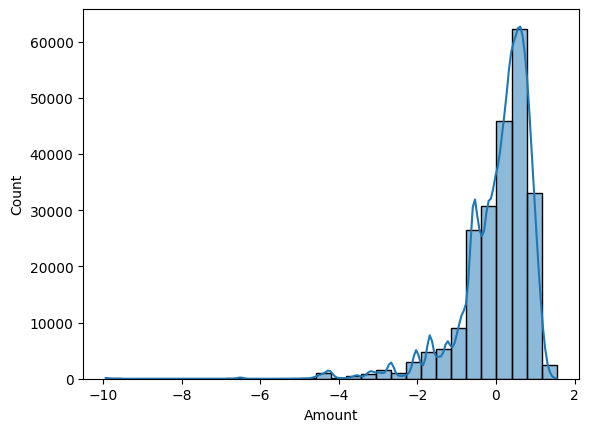

In [114]:
# Just plot log transformation without changing the data
_ = sns.histplot(data=np.log1p(X_train_scaled), x="Amount", bins=30, kde=True)

Still better than the original version but I think Power Transformer is the winner here because log transformed version is still skewed and most of the data resides in the 0-2 range which diverges from a gaussian distribution more than the power transformed one. Let's move on to **Time**.

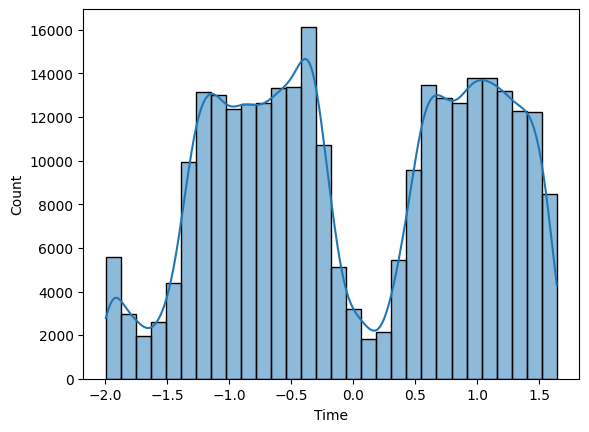

In [115]:
# Initialize Standard Scaler
ss = skp.StandardScaler()

# Scale the Time
X_train_scaled['Time'] = ss.fit_transform(pd.DataFrame(X_train_scaled['Time']))

# Plot the new distribution
_ = sns.histplot(data=X_train_scaled, x="Time", bins=30, kde=True)

After scaling, **Time** keeps its bimodal distribution, although in a normalized range this time. This distribution's distinct look likely tells us that transactions were clustered in two different time periods so trying to make them gaussian-like would lead to information loss. Let's check out our DataFrame once again to confirm the transformations normalized the distributions well enough.

In [116]:
print(f"Min Value in the DataFrame = {np.min(X_train_scaled)}")
print(f"Max Value in the DataFrame = {np.max(X_train_scaled)}")

# Display Info
X_train_scaled.describe()

Min Value in the DataFrame = -113.743306711146
Max Value in the DataFrame = 120.589493945238


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,-3.065637e-16,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,-1.037846e-17
std,1.000002e+00,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,1.000002e+00
min,-1.996583e+00,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-2.013010e+00
25%,-8.552120e-01,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-7.509351e-01
50%,-2.131453e-01,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,2.710132e-02
75%,9.372174e-01,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,7.483193e-01
max,1.642058e+00,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,3.674446e+00


Turns out I should have read the earlier describe output more carefully. Some features' ranges are still very different like **V7** which ranges from ~-43 to ~120. What if I run StandardScaler on all of them (Except the ones I already scaled)?

In [118]:
# Create a list of columns to scale with StandardScaler (Time and V features)
columns_to_scale_ss = [col for col in X_train_scaled.columns if col not in ['Amount']]

# Revert Time so that it is not scaled multiple times
X_train_scaled["Time"] = X_train["Time"]

# Apply StandardScaler only to the selected columns
X_train_scaled[columns_to_scale_ss] = ss.fit_transform(X_train_scaled[columns_to_scale_ss])

# Display the first few rows to check the scaling
X_train_scaled.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,-3.065637e-16,-1.506872e-17,-9.580116e-18,-8.622104e-17,-5.189230e-18,3.832046e-17,9.979288e-18,1.237432e-17,-3.193372e-18,7.234983e-19,5.588401e-18,-4.311052e-17,1.676520e-17,-1.252401e-17,2.594615e-17,-2.075692e-17,1.836189e-17,3.392958e-18,2.634532e-17,4.365938e-18,-1.247411e-18,-3.642440e-18,3.193372e-18,8.781773e-18,9.580116e-18,-5.029561e-17,5.887780e-18,2.444925e-18,-7.908585e-18,-1.037846e-17
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.996583e+00,-2.879855e+01,-4.403529e+01,-3.187173e+01,-4.013919e+00,-8.240810e+01,-1.963606e+01,-3.520940e+01,-6.130252e+01,-1.222802e+01,-2.258191e+01,-4.700128e+00,-1.869868e+01,-5.819392e+00,-2.004428e+01,-4.915191e+00,-1.612534e+01,-2.962645e+01,-1.133266e+01,-8.861402e+00,-7.069146e+01,-4.741907e+01,-1.506565e+01,-7.175446e+01,-4.683638e+00,-1.975033e+01,-5.401098e+00,-5.590660e+01,-4.674612e+01,-2.013010e+00
25%,-8.552120e-01,-4.698918e-01,-3.624707e-01,-5.872142e-01,-5.993788e-01,-5.010686e-01,-5.766822e-01,-4.478860e-01,-1.746805e-01,-5.853631e-01,-4.917360e-01,-7.470224e-01,-4.058964e-01,-6.516198e-01,-4.439565e-01,-6.368132e-01,-5.341353e-01,-5.695609e-01,-5.951621e-01,-5.605369e-01,-2.746334e-01,-3.109433e-01,-7.473476e-01,-2.591784e-01,-5.854676e-01,-6.084001e-01,-6.780717e-01,-1.755053e-01,-1.604440e-01,-7.509351e-01
50%,-2.131453e-01,9.245351e-03,3.965683e-02,1.186124e-01,-1.401724e-02,-3.936682e-02,-2.058046e-01,3.241723e-02,1.871982e-02,-4.681169e-02,-8.533551e-02,-3.209268e-02,1.401448e-01,-1.363250e-02,5.278702e-02,5.251917e-02,7.579255e-02,-7.732604e-02,-4.338370e-03,4.588014e-03,-8.104705e-02,-4.009429e-02,9.345377e-03,-1.792420e-02,6.765678e-02,3.183240e-02,-1.081217e-01,3.325174e-03,3.406368e-02,2.710132e-02
75%,9.372174e-01,6.716939e-01,4.867202e-01,6.774569e-01,5.250082e-01,4.433465e-01,2.991625e-01,4.611107e-01,2.740785e-01,5.435305e-01,4.168842e-01,7.245863e-01,6.187332e-01,6.656518e-01,5.144513e-01,7.088502e-01,5.971989e-01,4.705737e-01,5.974968e-01,5.637928e-01,1.725733e-01,2.537392e-01,7.283360e-01,2.364319e-01,7.257153e-01,6.728006e-01,4.996663e-01,2.255648e-01,2.371526e-01,7.483193e-01
max,1.642058e+00,1.253351e+00,1.335775e+01,6.187993e+00,1.191874e+01,2.521413e+01,5.502015e+01,9.747824e+01,1.675153e+01,1.419494e+01,2.180758e+01,1.177504e+01,7.854679e+00,7.160735e+00,1.098147e+01,9.699117e+00,1.976044e+01,1.089502e+01,6.014342e+00,6.869414e+00,5.113464e+01,3.703471e+01,1.447304e+01,3.607668e+01,7.569684e+00,1.442532e+01,7.293975e+00,7.831940e+01,1.025434e+02,3.674446e+00


In [119]:
print(f"Min Value in the DataFrame = {np.min(X_train_scaled)}")
print(f"Max Value in the DataFrame = {np.max(X_train_scaled)}")

Min Value in the DataFrame = -82.40809674972728
Max Value in the DataFrame = 102.54342136221207


Okay this range problem stems from the extreme outliers in some of these features. I think a **RobustScaler** would fit these features better to keep the outlier informaton as best as possible for possible outlier-fraud connection while maintaining proper scaling of the central distribution so I will be using **RobuestScaler** for **V1** to **V28**, **StandardScaler** for **Time** (which does not have outliers) and a **PowerTransformer** for **Amount**.

In [122]:
# Initialize Robust Scaler
rs = skp.RobustScaler()

# Remove time from StandardScaler list
if "Time" in columns_to_scale_ss:
  columns_to_scale_ss.remove("Time")

# Revert and scale Time with SS, scale V1 to V28 with RS
X_train_scaled["Time"] = ss.fit_transform(pd.DataFrame(X_train["Time"]))
X_train_scaled[columns_to_scale_ss] = rs.fit_transform(X_train[columns_to_scale_ss])

X_train_scaled.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,2.848070e+05
mean,-3.065637e-16,-0.008099,-0.046700,-0.093789,0.012467,0.041684,0.234978,-0.035663,-0.041715,0.041467,0.093918,0.021808,-0.136776,0.010349,-0.055078,-0.039028,-0.066994,0.074342,0.003638,-0.004081,0.181230,0.071003,-0.006333,0.036166,-0.051600,-0.024846,0.091805,-0.008291,-0.085674,-1.037846e-17
std,1.000002e+00,0.875976,1.177594,0.790721,0.889375,1.058858,1.141757,1.100116,2.228372,0.885825,1.100572,0.679530,0.975964,0.759146,1.043399,0.743129,0.883914,0.961416,0.838464,0.889420,2.236107,1.770910,0.677653,2.017718,0.762671,0.780519,0.849087,2.493334,2.515117,1.000002e+00
min,-1.996583e+00,-25.234901,-51.902285,-25.295389,-3.557406,-87.216663,-22.184587,-38.770014,-136.646287,-10.790391,-24.759049,-3.172063,-18.385986,-4.407413,-20.969224,-3.691644,-14.320381,-28.408945,-9.498372,-7.885579,-157.892131,-83.903734,-10.215599,-144.743845,-3.623671,-15.440333,-4.494188,-139.401862,-117.657402,-2.013010e+00
25%,-8.552120e-01,-0.419712,-0.473542,-0.558111,-0.520605,-0.488876,-0.423451,-0.528388,-0.430967,-0.477061,-0.447272,-0.485815,-0.532916,-0.484325,-0.518301,-0.512262,-0.539123,-0.473241,-0.495384,-0.502633,-0.432879,-0.479648,-0.512775,-0.486782,-0.498118,-0.499713,-0.483936,-0.445883,-0.489209,-7.509351e-01
50%,-2.131453e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.710132e-02
75%,9.372174e-01,0.580288,0.526458,0.441889,0.479395,0.511124,0.576549,0.471612,0.569033,0.522939,0.552728,0.514185,0.467084,0.515675,0.481699,0.487738,0.460877,0.526759,0.504616,0.497367,0.567121,0.520352,0.487225,0.513218,0.501882,0.500287,0.516064,0.554117,0.510791,7.483193e-01
max,1.642058e+00,1.089805,15.683274,4.799177,10.612681,26.739834,63.054506,107.201520,37.286865,12.615676,24.094682,8.023281,7.529095,5.446384,11.402953,7.168656,17.399498,10.548966,5.046439,6.105706,114.523532,65.656022,9.801353,72.828591,5.721572,11.234373,6.285011,195.267780,257.822531,3.674446e+00


Now to make sure, let's visualize all of them once again.

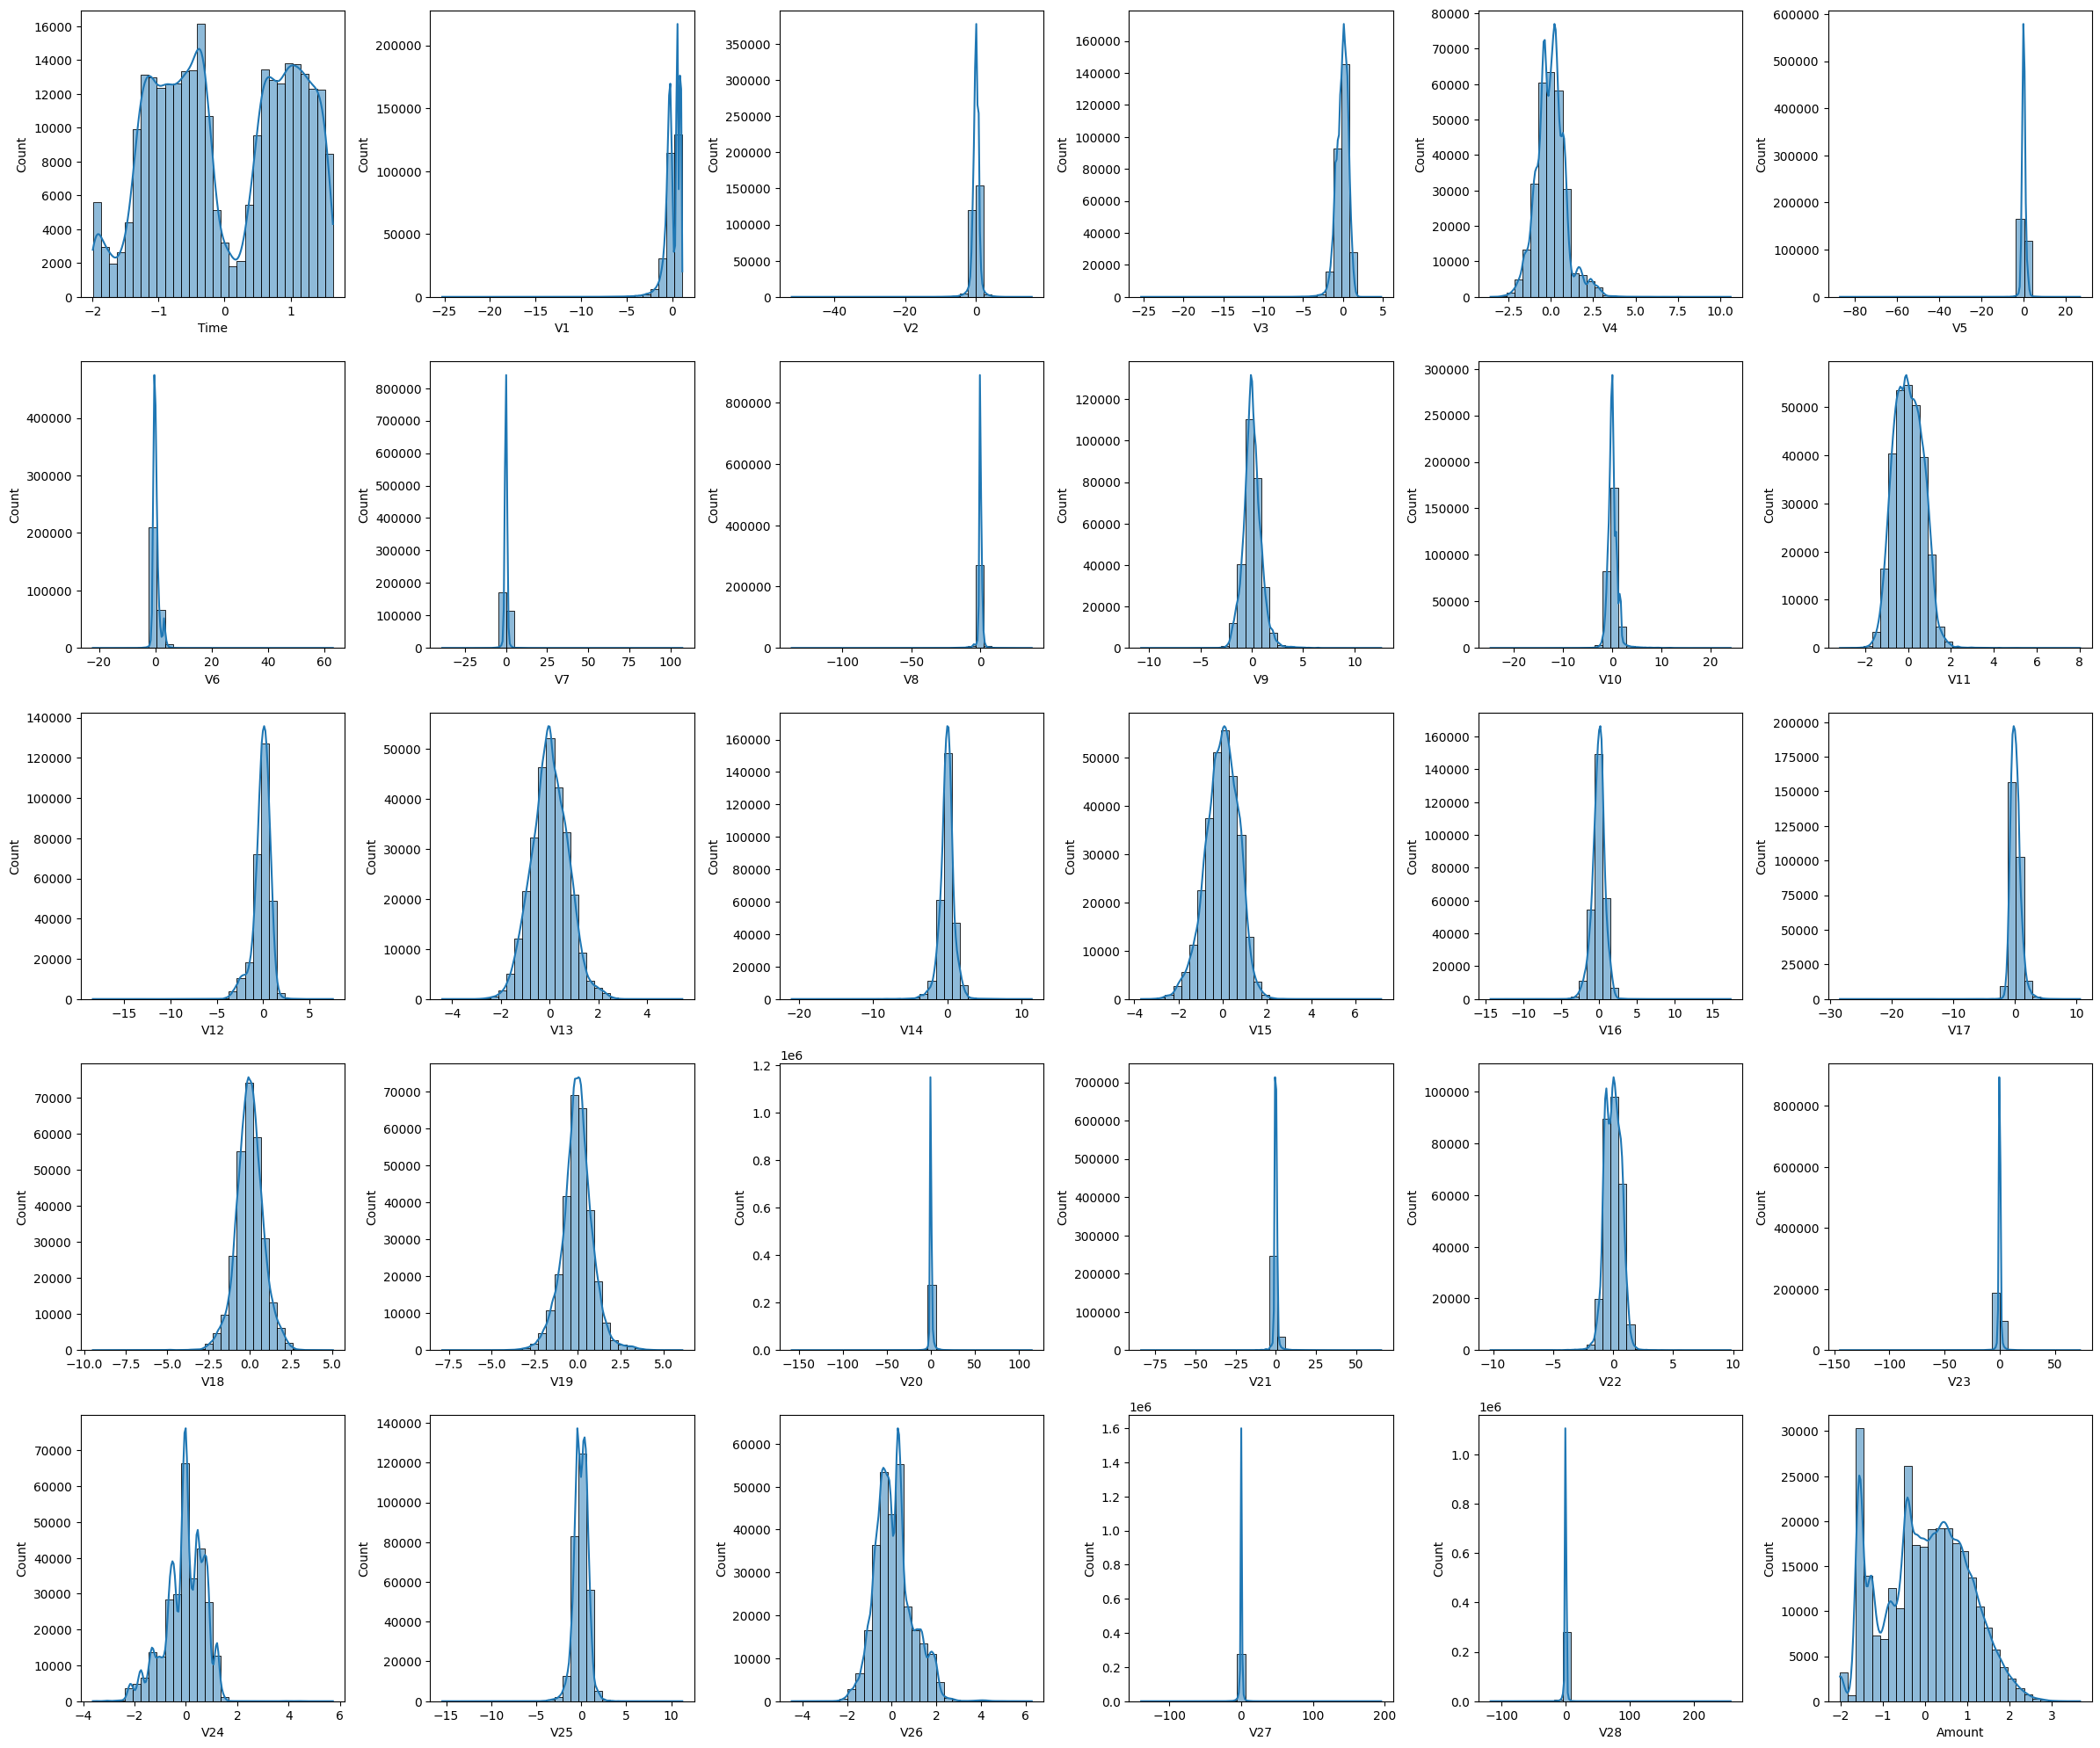

In [128]:
hist_plot_all_features(X_train_scaled)

Now the distributions look a lot better regularized whilst keeping the most information they could. It is time to separate our data into train and validation splits so that I can compare the performances of the models more accurately.

In [132]:
# Separate the data into train and test splits
X_train_split, X_test_split, y_train, y_test  = skm.train_test_split(X_train_scaled, y, test_size=0.3, random_state=42)